In [13]:
!pip install tensorflow

In [14]:
import tensorflow as tf
print(tf.__version__)

2.18.0


Importing Basic Libraries

In [15]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [16]:
dataset = pd.read_csv('/content/drive/MyDrive/Dataset/Churn_Modelling.csv')
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


Dividing the dataset into Dependent and Independent features

In [17]:
X = dataset.iloc[:,3:13]
y = dataset.iloc[:,13]

In [18]:
X.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10


In [19]:
y

,Exited
0,1
1,0
2,1
3,0
4,0
...,...
9995,0
9996,0
9997,1
9998,1


# Feature Engineering

In [20]:
geography = pd.get_dummies(X['Geography'],dtype=int,drop_first=True)
gender = pd.get_dummies(X['Gender'],dtype=int,drop_first=True)

In [21]:
geography

,Germany,Spain
0,0,0
1,0,1
2,0,0
3,0,0
4,0,1
...,...,...
9995,0,0
9996,0,0
9997,0,0
9998,1,0


In [22]:
gender

,Male
0,0
1,0
2,0
3,0
4,0
...,...
9995,1
9996,1
9997,0
9998,1


In [23]:
X=X.drop(['Geography','Gender'],axis=1)

In [24]:
X.head()
X.tail()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
9995,771,39,5,0.00,2,1,0,96270.64
9996,516,35,10,57369.61,1,1,1,101699.77
9997,709,36,7,0.00,1,0,1,42085.58
9998,772,42,3,75075.31,2,1,0,92888.52
9999,792,28,4,130142.79,1,1,0,38190.78


In [25]:
X=pd.concat([X,geography,gender],axis=1)

In [26]:
X.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,Male
0,619,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,1,0


In [27]:
X.tail()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,Male
9995,771,39,5,0.00,2,1,0,96270.64,0,0,1
9996,516,35,10,57369.61,1,1,1,101699.77,0,0,1
9997,709,36,7,0.00,1,0,1,42085.58,0,0,0
9998,772,42,3,75075.31,2,1,0,92888.52,1,0,1
9999,792,28,4,130142.79,1,1,0,38190.78,0,0,0


Spliting the dataset into Training and Test Set

In [28]:
from sklearn.model_selection import train_test_split

In [29]:
X_train, X_test, y_train,y_test = train_test_split(X,y,test_size = 0.2, random_state=0)

In [58]:
y_test

,Exited
9394,0
898,1
2398,0
5906,0
2343,0
...,...
1037,0
2899,0
9549,0
2740,0


Feature Scaling

In [30]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [31]:
X_train

array([[ 0.16958176, -0.46460796,  0.00666099, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-2.30455945,  0.30102557, -1.37744033, ...,  1.75486502,
        -0.57369368,  0.91601335],
       [-1.19119591, -0.94312892, -1.031415  , ..., -0.5698444 ,
        -0.57369368, -1.09168714],
       ...,
       [ 0.9015152 , -0.36890377,  0.00666099, ..., -0.5698444 ,
        -0.57369368,  0.91601335],
       [-0.62420521, -0.08179119,  1.39076231, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-0.28401079,  0.87525072, -1.37744033, ...,  1.75486502,
        -0.57369368, -1.09168714]])

In [32]:
X_test

array([[-0.55204276, -0.36890377,  1.04473698, ...,  1.75486502,
        -0.57369368, -1.09168714],
       [-1.31490297,  0.10961719, -1.031415  , ..., -0.5698444 ,
        -0.57369368, -1.09168714],
       [ 0.57162971,  0.30102557,  1.04473698, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       ...,
       [-0.74791227, -0.27319958, -1.37744033, ..., -0.5698444 ,
         1.74309049,  0.91601335],
       [-0.00566991, -0.46460796, -0.33936434, ...,  1.75486502,
        -0.57369368,  0.91601335],
       [-0.79945688, -0.84742473,  1.04473698, ...,  1.75486502,
        -0.57369368,  0.91601335]])

ANN Creation

In [33]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LeakyReLU,PReLU,ELU,ReLU
from tensorflow.keras.layers import Dropout

Initializing ANN

In [34]:
classifier = Sequential()

Adding Input Layer

In [35]:
classifier.add(Dense(units=11,activation='relu'))

Adding the first Hidden Layer

In [36]:
classifier.add(Dense(units=7,activation='relu'))

In [37]:
classifier.add(Dense(units=6,activation='relu'))

Adding the output layer

In [38]:
classifier.add(Dense(units=1,activation='sigmoid'))

In [39]:
classifier.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

Early Stopping

In [43]:
import tensorflow as tf
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0.0001,
    patience=20,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False,
    start_from_epoch=0,
)

In [44]:
model_history = classifier.fit(X_train,y_train,validation_split=0.33,batch_size=10,epochs=1000,callbacks=early_stopping)

Epoch 1/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8693 - loss: 0.3148 - val_accuracy: 0.8531 - val_loss: 0.3681
Epoch 2/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8682 - loss: 0.3151 - val_accuracy: 0.8501 - val_loss: 0.3754
Epoch 3/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8624 - loss: 0.3240 - val_accuracy: 0.8519 - val_loss: 0.3698
Epoch 4/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.8766 - loss: 0.3055 - val_accuracy: 0.8508 - val_loss: 0.3681
Epoch 5/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8751 - loss: 0.3041 - val_accuracy: 0.8527 - val_loss: 0.3682
Epoch 6/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8776 - loss: 0.3036 - val_accuracy: 0.8508 - val_loss: 0.3687
Epoch 7/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8668 - loss: 0.3175 - val_accuracy: 0.8501 - val_loss: 0.3694
Epoch 8/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8742 - loss: 0.3089 - 

In [47]:
model_history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

History Accuracy Graph

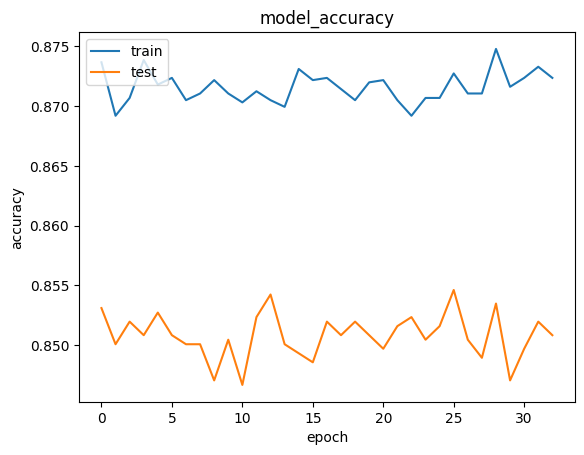

In [55]:
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model_accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'],loc='upper left')
plt.show()

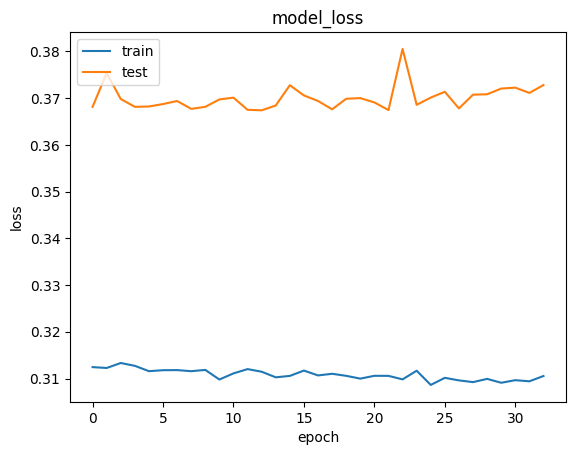

In [54]:
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model_loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'],loc='upper left')
plt.show()

Predictions

In [56]:
y_pred = classifier.predict(X_test)
y_pred = (y_pred >=0.5)

63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step


In [59]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)
cm

array([[1511,   84],
       [ 201,  204]])

In [61]:
from sklearn.metrics import accuracy_score
score = accuracy_score(y_pred,y_test)

In [62]:
score

0.8575

Getting the weights

In [65]:
classifier.get_weights()

[array([[ 0.10798118,  0.17892161,  0.07687047,  0.34907648, -0.36071277,
         -0.06565909,  0.10925081,  0.8627629 , -0.1894715 ,  0.3305435 ,
         -0.06009722],
        [-0.83413863,  0.34563082,  0.18709259, -0.5631719 , -0.5153065 ,
         -0.07317031, -0.22023128, -1.1155157 ,  0.68807584,  0.18862674,
          0.13141282],
        [ 0.03843486,  0.32280087, -0.18993819,  0.5998827 , -0.47619537,
         -0.35077658, -0.04233561,  0.4281903 , -0.94708467,  0.52703005,
         -0.11840227],
        [ 0.10806874, -0.2351291 , -0.67399406, -0.72878045, -0.01504492,
         -0.4559174 ,  0.11088111, -0.10110439,  0.07650775,  0.02341123,
         -0.33165145],
        [ 0.09172128,  0.29990253, -0.04378311, -0.22359402,  0.63344437,
         -1.0583562 ,  1.0452646 , -0.42294207,  0.18283373,  1.1812881 ,
         -0.13101329],
        [ 0.0529939 ,  0.0504913 , -0.10082953, -0.4143211 ,  0.397112  ,
          0.13595359, -0.04216468,  0.27681008, -0.07709057,  0.0853300